In [11]:

!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels joblib

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

%matplotlib inline
sns.set(style="whitegrid")
RANDOM_STATE = 42


In [12]:
file_path = "house_price.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:   
    np.random.seed(RANDOM_STATE)
    n = 300
    sqft = np.random.normal(1500, 400, n).clip(300)
    bedrooms = np.random.randint(1, 6, n)
    bathrooms = np.round(np.random.uniform(1, 4, n), 1)
   
    price = 50000 + 120 * sqft + 15000 * bedrooms + 10000 * bathrooms + np.random.normal(0, 30000, n)
    df = pd.DataFrame({'price': price, 'sqft': sqft, 'bedrooms': bedrooms, 'bathrooms': bathrooms})
    df.to_csv(file_path, index=False)
    print(f"No CSV found — a synthetic dataset was created at {file_path}")

df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [13]:
print("Shape:", df.shape)
print("\nColumns & dtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
display(df.describe().T)


Shape: (1000, 8)

Columns & dtypes:
 Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object

Missing values:
 Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.500000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06


In [21]:
print(df.columns)


Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')


In [22]:


df = df.rename(columns={
    'House_Price': 'price',
    'Square_Footage': 'sqft',
    'Num_Bedrooms': 'bedrooms',
    'Num_Bathrooms': 'bathrooms'
})


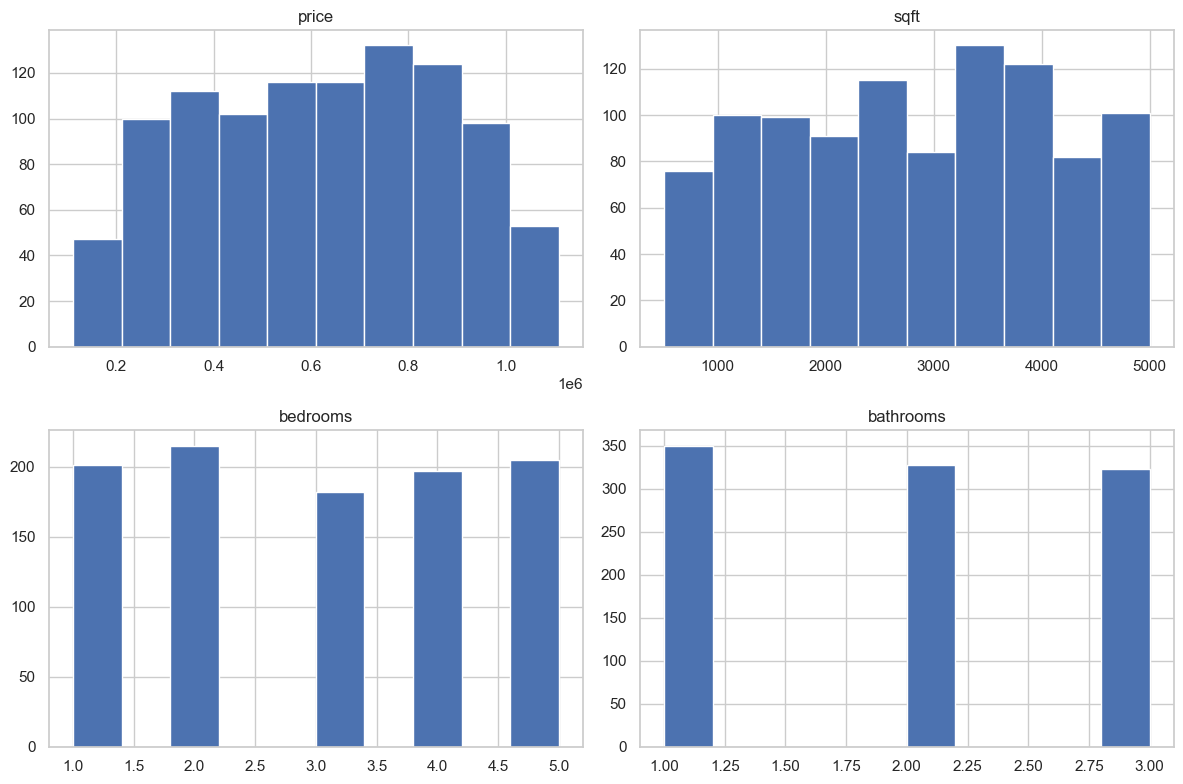

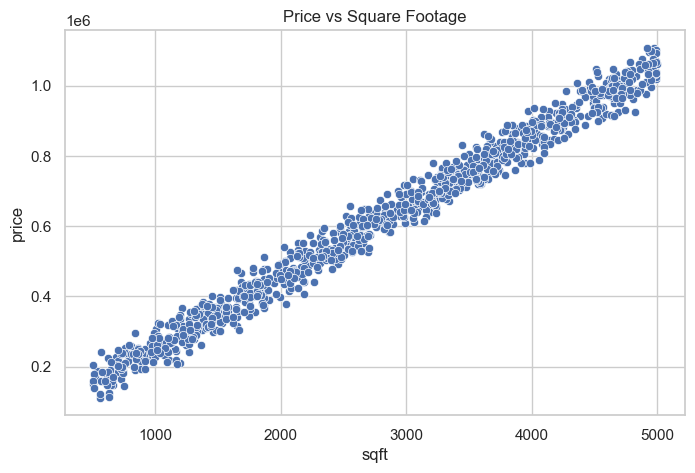

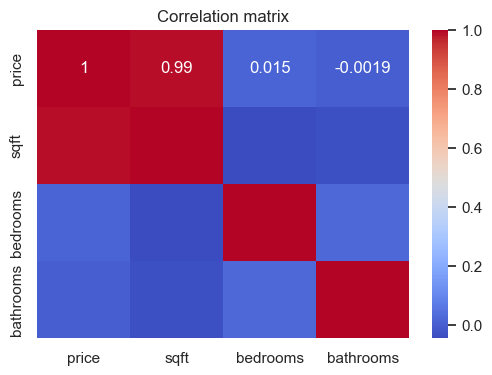

In [23]:

df[['price', 'sqft', 'bedrooms', 'bathrooms']].hist(figsize=(12,8))
plt.tight_layout()

plt.figure(figsize=(8,5))
sns.scatterplot(x='sqft', y='price', data=df)
plt.title('Price vs Square Footage')

plt.figure(figsize=(6,4))
sns.heatmap(df[['price','sqft','bedrooms','bathrooms']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


In [24]:
df = df.replace([float('inf'), -float('inf')], float('nan'))
df = df.dropna(subset=['price', 'sqft', 'bedrooms', 'bathrooms'])

C:\Users\91990\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91990\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91990\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91990\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

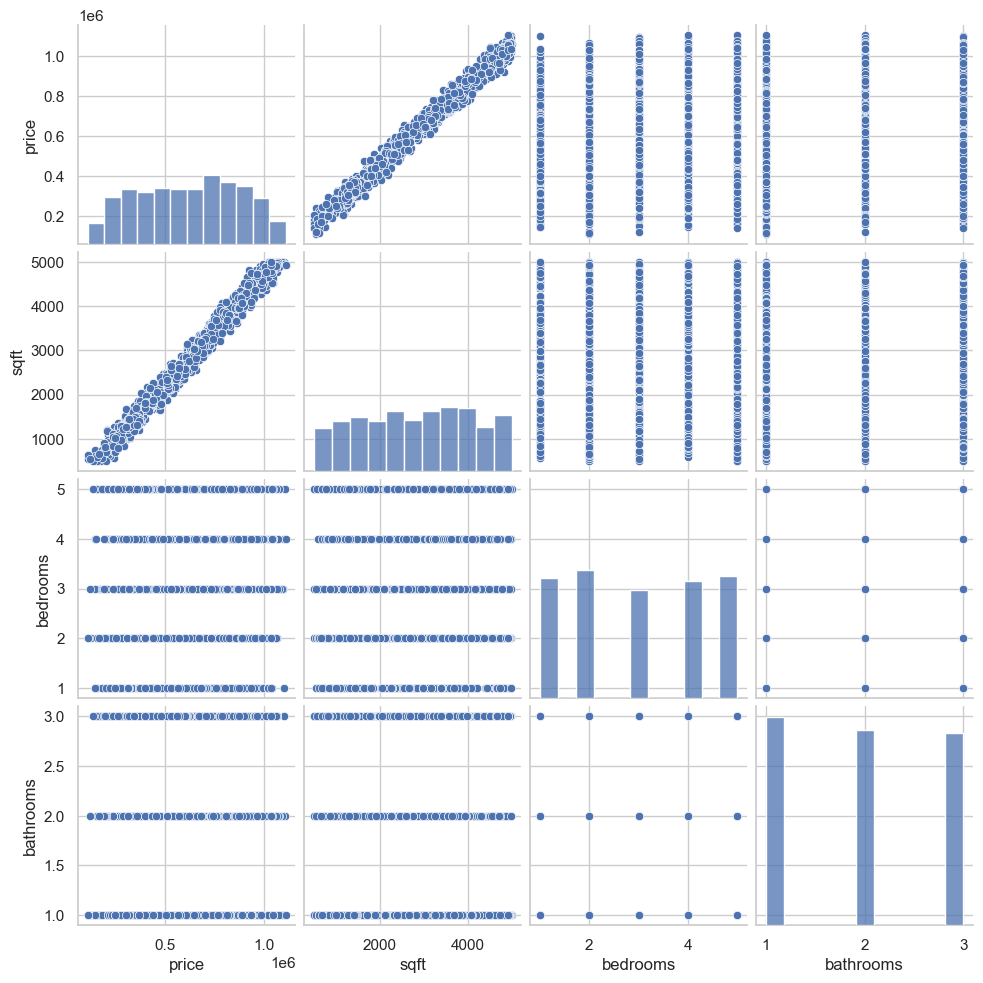

In [25]:
sns.pairplot(df[['price','sqft','bedrooms','bathrooms']])
plt.show()

In [26]:
df = df.drop_duplicates()
print("Missing before:", df.isnull().sum())
df = df.dropna()   
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df = df[(df['price'] >= lower) & (df['price'] <= upper)]
print("Shape after cleaning:", df.shape)


Missing before: sqft                    0
bedrooms                0
bathrooms               0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
price                   0
dtype: int64
Shape after cleaning: (1000, 8)


In [27]:
df['price_per_sqft'] = df['price'] / df['sqft']
df['log_price'] = np.log1p(df['price'])  


In [28]:
FEATURES = ['sqft','bedrooms','bathrooms']   
TARGET = 'price'                             
X = df[FEATURES]
y = df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (800, 3) Test shape: (200, 3)


In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

coef_df = pd.DataFrame({
    'feature': FEATURES,
    'coefficient': lr.coef_
})
print("Intercept:", lr.intercept_)
display(coef_df)
y_pred = lr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


Intercept: 38993.90847700433


,feature,coefficient
0,sqft,125.823417
1,bedrooms,15836.436905
2,bathrooms,11656.789956


MAE: 29755.694542583493
MSE: 1360178516.3831124
RMSE: 36880.59810229645
R2: 0.6211752094733047


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Example features and target
X = df[['sqft', 'bedrooms', 'bathrooms']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Text(0.5, 1.0, 'Residuals vs Predicted')

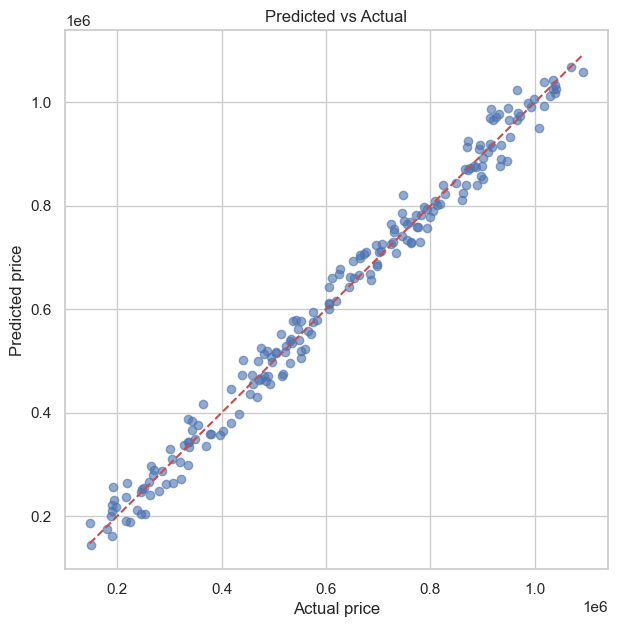

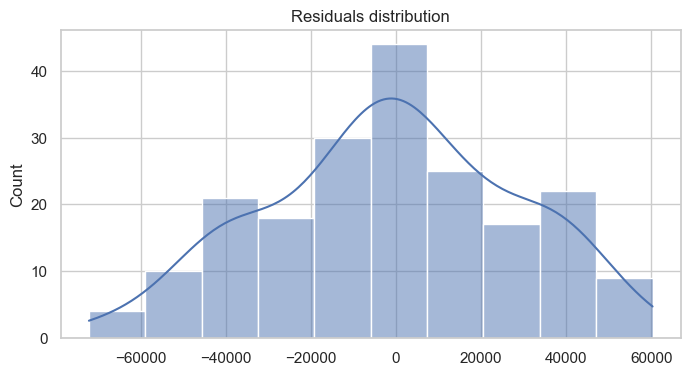

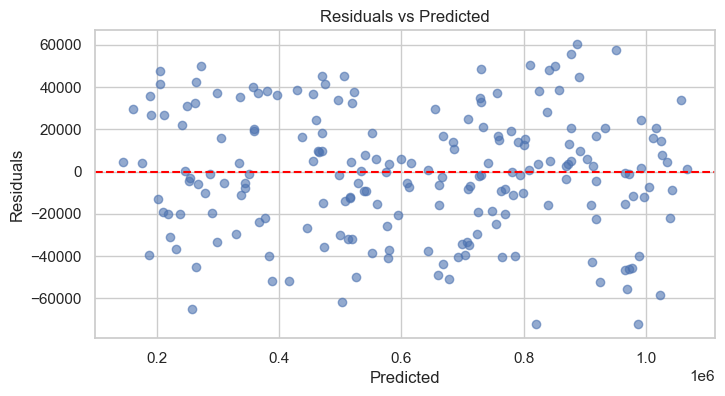

In [31]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")
y_pred = np.nan_to_num(y_pred, nan=np.nan, posinf=np.nan, neginf=np.nan)
y_test = np.nan_to_num(y_test, nan=np.nan, posinf=np.nan, neginf=np.nan)

mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test = y_test[mask]
y_pred = y_pred[mask]
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Predicted vs Actual")
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals distribution")
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")


In [32]:
cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("CV R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())


CV R2 scores: [0.98460914 0.98621273 0.98904984 0.98707457 0.98591008]
Mean CV R2: 0.9865712709122285


In [33]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', Ridge())
])

param_grid = {
    'reg': [Ridge(), Lasso()],
    'reg__alpha': [0.01, 0.1, 1.0, 10.0, 50.0]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test R2 of best model:", r2_score(y_test, y_pred_best))


Best params: {'reg': Ridge(alpha=0.1), 'reg__alpha': 0.1}
Test R2 of best model: 0.9868712643095039


In [34]:
poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('reg', Ridge(alpha=1.0))
])
poly_pipe.fit(X_train, y_train)
print("Poly Test R2:", r2_score(y_test, poly_pipe.predict(X_test)))


Poly Test R2: 0.9867995040729871


In [35]:
model_path = "linear_model.joblib"
joblib.dump(best_model, model_path)
print("Saved model to", model_path)

Saved model to linear_model.joblib


In [36]:
new_sample = pd.DataFrame({'sqft':[3300], 'bedrooms':[3], 'bathrooms':[2]})
pred_price = best_model.predict(new_sample)[0]
print("Predicted price:", pred_price)

Predicted price: 716933.145541128
